### Nose-poke failure and correctness
To examine if rats were more likely to make correct choice if they sampled the same stimulus again after they failed to maintain nose-poke (incomplete sampling).

In [1]:
import os
from pathlib import Path
from glob import glob

import numpy as np
import pandas as pd

from scipy import stats

import pingouin as pg

import matplotlib as mpl
import matplotlib.pyplot as plt

In [55]:
mother_path = Path('D:/Multi-modal project/')
rat_list = ['LE874', 'LE876', 'LE903', 'LE904', 'LE905', 'LE907']
#rat_list = ['LE600', 'LE602', 'LE633', 'LE640', 'LE647', 'LE654', 'LE679', 'LE699']

In [151]:
result = np.zeros((len(rat_list),4))
for i,r in enumerate(rat_list):
    pre_path = mother_path / 'behavior' / 'inactivation' / r / 'presurgical'
    post_path = mother_path / 'behavior' / 'inactivation' / r / 'postsurgical'
    
    # pre-surgical sessions with above-criterion-performance
    pre_list = glob(str(pre_path / '*_2 Pairs*.csv'))
    # post-surgical sessions with above-criterion-performance
    post_list = glob(str(post_path / '*_2 Pairs*.csv'))
    # pre + post
    bev_list = pre_list[-2:]+post_list[-2:]

    for b in bev_list:
        df = pd.read_csv(b)
        
        # trials with nose-poke failure
        df_fail = df[df['NosepokeLatency']==0]
        fail_trial = df_fail['Trial'].unique()
        
        for t in fail_trial:
            # last trial with nose-poke failure
            fail = df_fail.loc[df_fail['Trial']==t,:].iloc[-1]
            fail_stim = str(fail['Visual'])+str(fail['Auditory'])
            
            # successful nose-poke trial
            success = df.loc[df['Trial']==t,:].iloc[-1]
            success_stim = str(success['Visual'])+str(success['Auditory'])
    
            if fail_stim == success_stim:    # stimuli were the same between nose-poke failure and success
                result[i,0] += 1
                if success['Correctness']==1:
                    result[i,1] += 1
            else:    # stimuli were different between nose-poke failure and success
                result[i,2] += 1
                if success['Correctness']==1:
                    result[i,3] += 1

Text(0, 0.5, 'Trials')

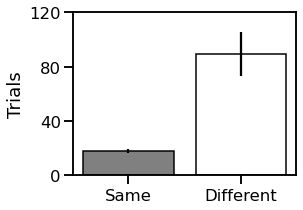

In [167]:
trial_mean = np.mean(result,axis=0)[[0,2]]
trial_sem = stats.sem(result,axis=0)[[0,2]]

x = ['Same', 'Different']
fig,ax = plt.subplots(figsize=(4,3))
ax.bar(x, trial_mean, yerr=trial_sem, color=['gray','white'], edgecolor='black')
ax.set_yticks(np.arange(0,130,40));
ax.set_ylabel('Trials')

Text(0, 0.5, 'Correct %')

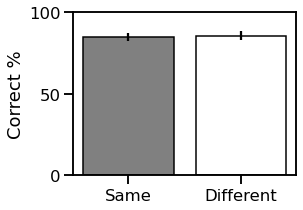

In [180]:
same_corr = (result[:,1]/result[:,0])*100
diff_corr = (result[:,3]/result[:,2])*100

corr_mean = [np.mean(same_corr), np.mean(diff_corr)]
corr_sem = [stats.sem(same_corr), stats.sem(diff_corr)]

x = ['Same', 'Different']
fig,ax = plt.subplots(figsize=(4,3))
ax.bar(x, corr_mean, yerr=corr_sem, color=['gray','white'], edgecolor='black')
ax.set_yticks(np.arange(0,110,50));
ax.set_ylabel('Correct %')